In [1]:
import numpy as np
import matplotlib.pyplot as plt
import multiprocess as mp

In [2]:
STEPCOUNT = 1920
START = 0.34
END = 0.38
STEP = (END - START) / STEPCOUNT

In [3]:
magnitude = lambda c: np.sqrt(pow(c.real,2) + pow(c.imag,2))
def part_of_mandelbrot(c, g=2, trials=125):
    z = 0
    for _ in range(trials):
        z = z * z + c
        if magnitude(z) > g: return False
    return True

In [4]:
space = np.zeros((STEPCOUNT, STEPCOUNT), dtype=np.complex_)
space_range = np.arange(START, END, STEP)[:STEPCOUNT]
for x, real in enumerate(space_range):
    for y, imaginary in enumerate(space_range):
        space[x, y] = complex(real, imaginary)
space_shape = space.shape
space = space.flatten()
with mp.Pool() as p: space = np.array(p.map(part_of_mandelbrot, space))
mandelbrot = space.reshape(space_shape).T

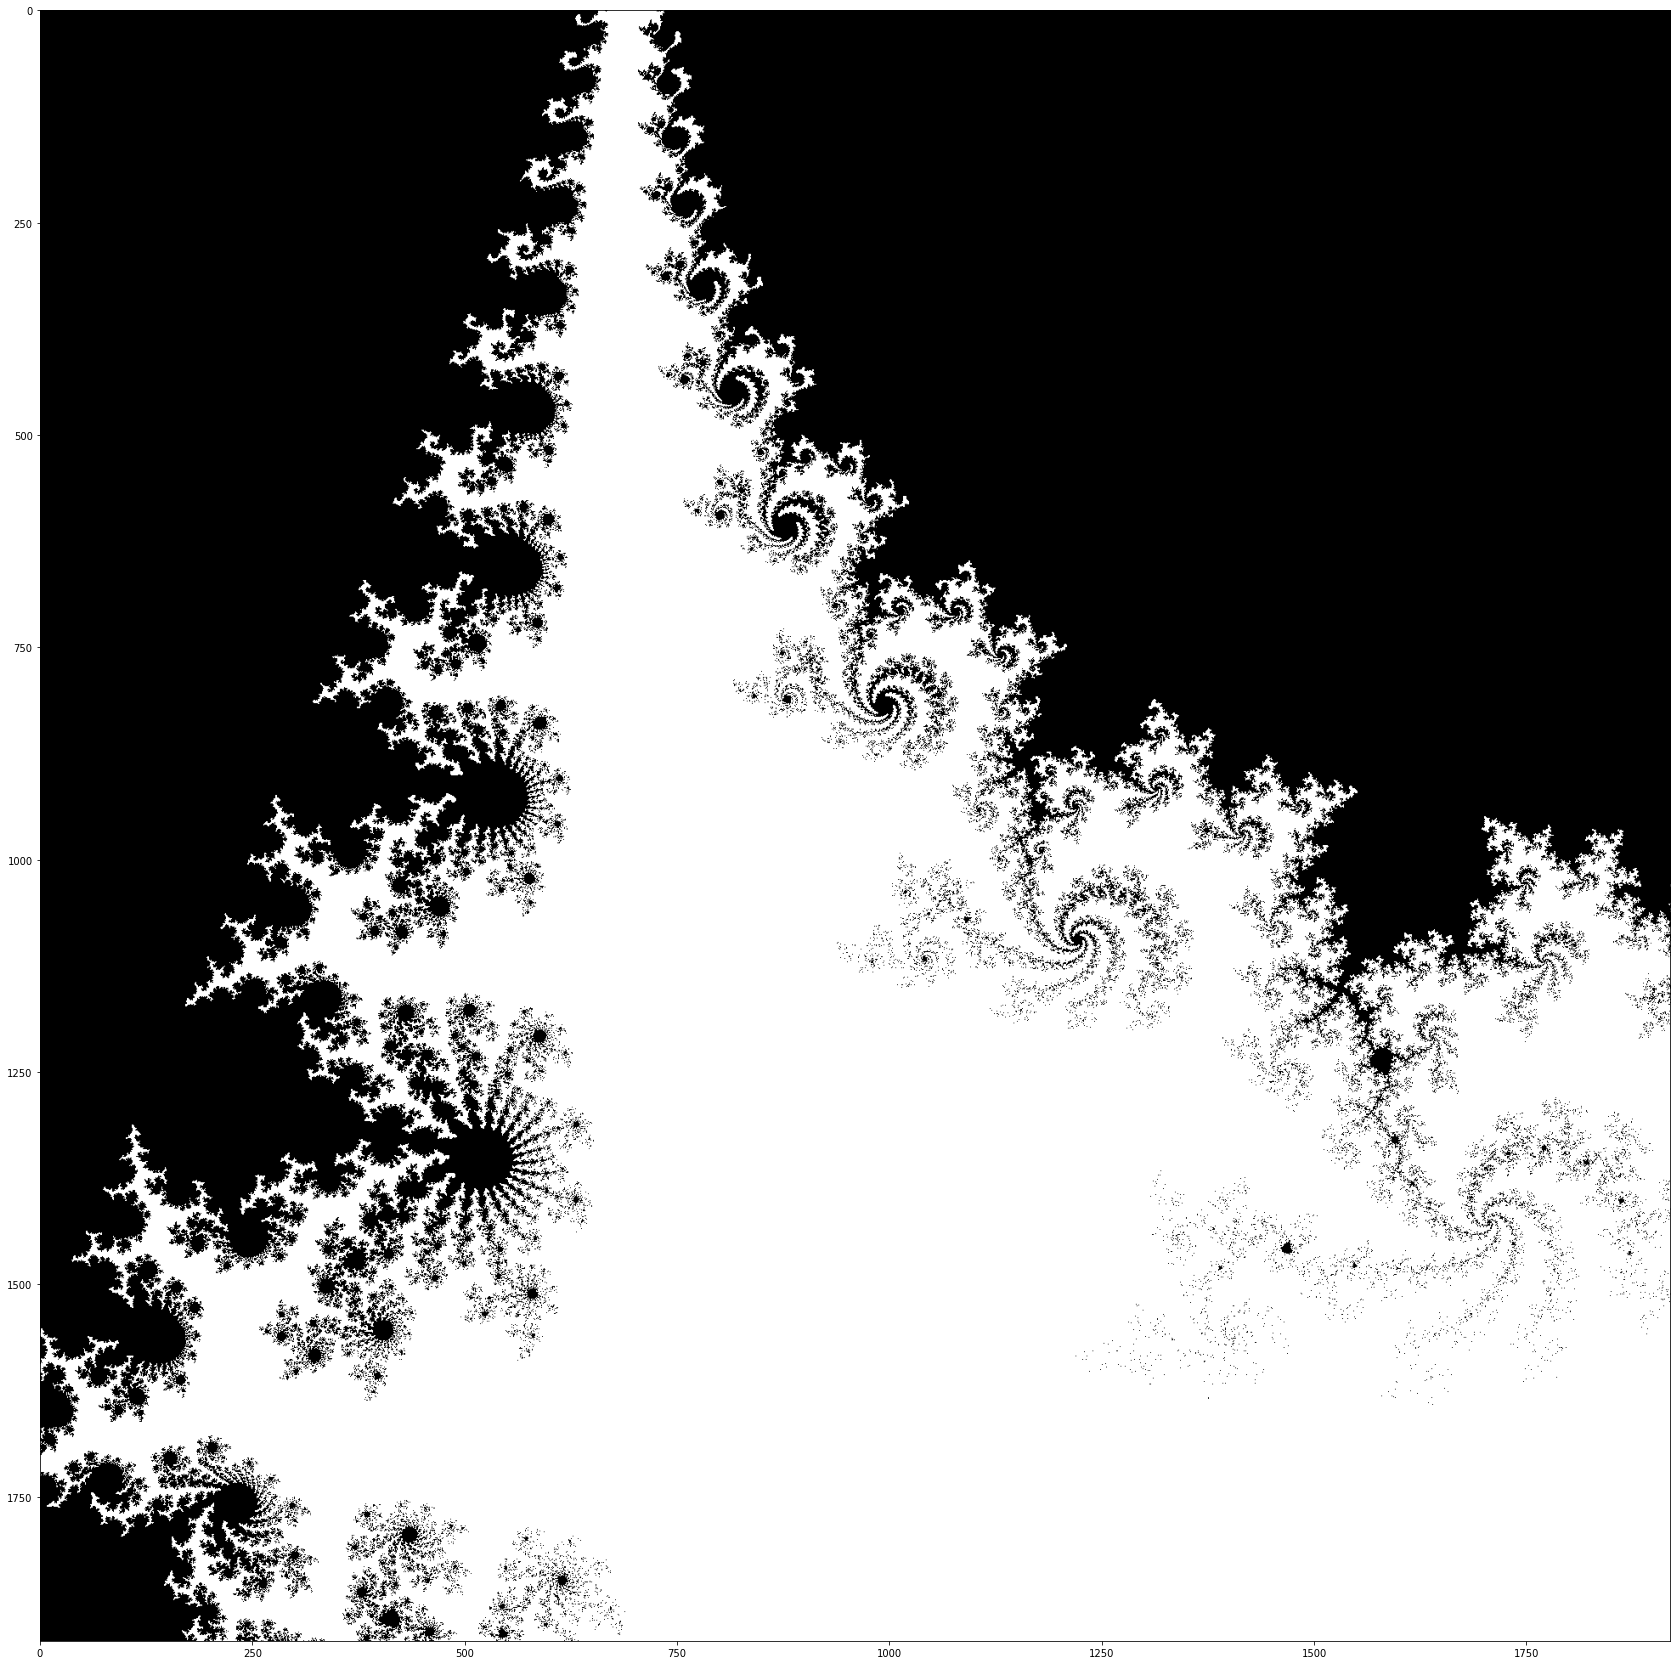

In [5]:
plt.figure(figsize=(30, 30))
plt.imshow(mandelbrot, cmap="binary");